In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [2]:
def load_data(path, rows = 300000):
    """
    Load the training data
    rows --> maximum number of rows to load from the dataset

    """
    data = pd.read_csv(path, header=None, sep=',')
    data = data.drop_duplicates()
    data = data.sample(frac = 1)
    data = data.reset_index(drop=True)
    data = data[:rows]
    data.columns = ['1', '2', '3', '4', '5', 'MA_col1', 'MA_col2', 'MA_col3', 'MA_col4', 'MA_col5']
    
    return data[['MA_col1', 'MA_col2']]

def load_data_test(path, rows = 25000):
    """
    Load the testing data (HT clean and HT contaminated)
    rows --> maximum number of rows to load from the dataset
    
    """
    data = pd.read_csv(path, header=None, sep=',')
    data = data.sample(frac = 1)
    data = data.reset_index(drop=True)
    data = data[:rows]
    data.columns = ['1', '2', '3', '4', '5', 'MA_col1', 'MA_col2', 'MA_col3', 'MA_col4', 'MA_col5']
    # data = data.drop_duplicates()
    return data[['MA_col1', 'MA_col2']]

In [3]:
# #train_file_path = r'C:\Users\Gor\Desktop\New_experiments\virus_detection\data\x_train.txt'
# train_file_path = r'C:\Users\Gor\Desktop\New_experiments\Important_files-3\new_DATA\Split_into_train_test\my_training_data.txt'
# train_data = load_data(train_file_path)

# #test_file_path = r'C:\Users\Gor\Desktop\New_experiments\virus_detection\data\x_test_HTfree.txt'
# test_file_path = r'C:\Users\Gor\Desktop\New_experiments\Important_files-3\new_DATA\Split_into_train_test\my_testing_data.txt'
# test_data = load_data_test(test_file_path)

# trojan_file_path = r'C:\Users\Gor\Desktop\New_experiments\Important_files-3\new_DATA\Split_into_train_test\my_trojan_data.txt'
# trojan_data = load_data_test(trojan_file_path)

In [29]:
# Define number of rows to load from the dataset
Number_of_train_rows = 1000000 
Number_of_test_rows = 5000  # This is only half of the overall test dataframe, since we append HT-clean to HT-contaminated


# Load the dataframes

train_file_path  = r'C:\Users\Gor\Desktop\New_experiments\Important_files-3\new_DATA\Split_into_train_test\HT_toDraw2Ddiagram\4\my_training_data.txt'
test_file_path   = r'C:\Users\Gor\Desktop\New_experiments\Important_files-3\new_DATA\Split_into_train_test\HT_toDraw2Ddiagram\4\my_testing_data.txt'
trojan_file_path = r'C:\Users\Gor\Desktop\New_experiments\Important_files-3\new_DATA\Split_into_train_test\HT_toDraw2Ddiagram\4\my_trojan_data.txt'


# Generate train data
train_data = load_data(train_file_path, rows = Number_of_train_rows)
X_train = np.r_[train_data]
n_train_rows, n_train_columns = X_train.shape

# Generate some regular novel observations
test_data = load_data_test(test_file_path, rows = Number_of_test_rows)
X_test = np.r_[test_data]
n_test_rows, test_columns = X_test.shape

# Generate some abnormal novel observations
trojan_data = load_data_test(trojan_file_path, rows = Number_of_test_rows)
X_outliers = np.r_[trojan_data]
n_outliers_rows, outliers_columns = X_outliers.shape

In [30]:

# #xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# # xx, yy = np.meshgrid(np.linspace(-10, 300, 1000), np.linspace(-10, 300, 1000))


# # Generate train data
# # X = 0.3 * np.random.randn(100, 2)
# # X_train = np.r_[X + 2, X - 2]
# X = train_data 
# X_train = np.r_[X]
# n_train_rows, n_train_columns = X_train.shape



# # Generate some regular novel observations
# # X = 0.3 * np.random.randn(20, 2)
# # X_test = np.r_[X + 2, X - 2]
# X = test_data 
# X_test = np.r_[X]
# n_test_rows, test_columns = X_test.shape



# # Generate some abnormal novel observations

# # # X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
# # X_HT = np.random.uniform(low=10, high=15, size=(1000, 1))
# # index = np.random.randint(n_test_rows, size=1000)
# # #X_outliers = np.r_[X_test[index, :] + X_HT]
# # X_outliers1 = X_test[index, 0:1] + X_HT
# # X_outliers2 = X_test[index, 1:2]
# # X_outliers = np.append(X_outliers1, X_outliers2, axis=1)

# X_outliers = np.r_[trojan_data]
# n_outliers_rows, outliers_columns = X_outliers.shape


In [33]:
# nu_list = [0.0001, 0.2, 0.4, 0.6, 0.8, 0.999] 0.0001- 0.11
# gamma_list = [0.999, 0.01, 0.005, 0.0033, 0.0025]
# nu_list = [0.00025]
# gamma_list = [0.015]
nu_list = [0.00025]
gamma_list = [0.02]
df = pd.DataFrame(columns = ['F1_score', 'Precision', 'Recall', 'No_Sup_Vec', 'nu', 'gamma'])
# df.columns = ['F1_score', 'Precision', 'Recall', 'No_Sup_Vec', 'nu', 'gamma']
# Precision_list = np.array([])
# Recall_list = np.array([])
# F1_score_list = np.array([])

# Results_file = open("RESULTS_two_features.txt", "a")
# Results_file.write("kernel , nu   , gamma   , TP   , FN   , FP   , TN   , Num of Support Vectors\n")
# Results_file.close()

print("Beginning the training...\n")
for nu in nu_list:
    for gamma in gamma_list:
        
        # fit the model

        # clf = svm.OneClassSVM(nu=0.005, kernel="rbf", gamma=0.01)
        # nu=0.01
        # gamma=0.05
        kernel = "rbf"
        clf = svm.OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)
        clf.fit(X_train)

        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        y_pred_outliers = clf.predict(X_outliers)
        
        
        n_error_train = y_pred_train[y_pred_train == -1].size
        n_correct_test = y_pred_test[y_pred_test == 1].size
        n_error_test = y_pred_test[y_pred_test == -1].size
        n_correct_outliers = y_pred_outliers[y_pred_outliers == -1].size
        n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
        ######################
        TP = round(100 - (n_error_test/y_pred_test.size)*100, 5)
        FN = round((n_error_test/y_pred_test.size)*100, 5)
        FP = round((n_error_outliers/y_pred_outliers.size)*100, 5)
        TN = round(100 - (n_error_outliers/y_pred_outliers.size)*100, 5)
        Precision = round(n_correct_test/(n_correct_test+n_error_outliers), 3)
        Recall = round(n_correct_test/(n_correct_test+n_error_test), 3)
        F1_score = round(2*Precision*Recall/(Precision+Recall), 3)
        
        num_of_support_vectors = clf.support_vectors_.shape[0]
        ######################
        
#         Results_file = open("RESULTS_two_features.txt", "a")
#         Results_file.write("\n")
#         Results_file.write("{}  , {}  , {}  , {}  , {}  , {}  , {}  , {}\n".format(kernel, nu, gamma, TP, FN, FP, TN, num_of_support_vectors))
#         Results_file.close()
        df.append({'F1_score': F1_score, 'Precision':Precision, 'Recall':Recall, 'No_Sup_Vec':num_of_support_vectors, 'nu':nu, 'gamma':gamma }, ignore_index=True)
#         Precision_list = np.append(Precision_list, Precision)
#         Recall_list = np.append(Recall_list, Recall)
#         F1_score_list = np.append(F1_score_list, F1_score)
        print(" F1_score: {},  Precision: {},  Recall: {},  No_Sup_Vec: {},  nu: {}, gamma: {}".format(F1_score, Precision, Recall, num_of_support_vectors, nu, gamma))


Beginning the training...

 F1_score: 0.837,  Precision: 0.72,  Recall: 0.999,  No_Sup_Vec: 280,  nu: 0.00025, gamma: 0.02


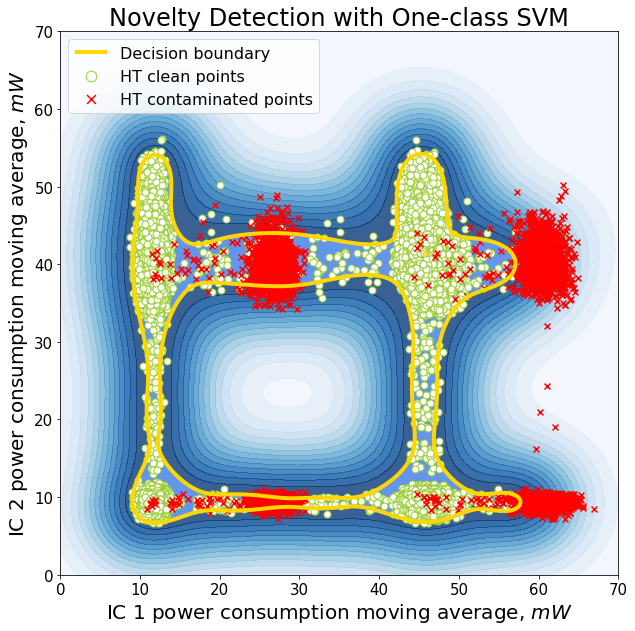

In [35]:
# plot the line, the points, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(0, 70, 1000), np.linspace(0, 70, 1000))


Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.title("Novelty Detection with One-class SVM", fontsize=24)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 15), cmap='Blues', alpha=0.8)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=4, colors='gold')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='cornflowerblue')


# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=10, edgecolors='yellowgreen', marker='o')
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=50, edgecolors='yellowgreen', marker='o')

# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=10, edgecolors='green',  marker='*')
ht = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=35, edgecolors='red', marker='x')


ax = plt.axis('tight')
plt.xlim((0, 70))
plt.ylim((0, 70))

plt.legend([a.collections[0], b1, ht],
           ["Decision boundary", "HT clean points", "HT contaminated points"],
           loc="upper left",
           markerscale = 1.5,
           prop=matplotlib.font_manager.FontProperties(size=16)
          
          )
# plt.xlabel(
#     "Errors train: %d/%d ; "
#     "Errors novel regular: %d/%d ; "
#     "Errors novel abnormal: %d/%d"
#     % (n_error_train, n_train_rows ,n_error_test, n_test_rows, n_error_outliers, n_outliers_rows))

myfont = {'fontname':'Constantia'}
plt.xlabel('IC 1 power consumption moving average, $mW$', fontsize=20, )
plt.ylabel('IC 2 power consumption moving average, $mW$', fontsize=20, )

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [8]:
# *REVISITED
# print('Training - False Negative rate (%) ')
# print((n_error_train/y_pred_train.size)*100)

# print('\nTesting - False Negative rate (%) ')
# print((n_error_test/y_pred_test.size)*100)

# print('\nTesting - False Positive rate (%) ')
# print((n_error_outliers/y_pred_outliers.size)*100)

n_correct_test = y_pred_test[y_pred_test == 1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_correct_outliers = y_pred_outliers[y_pred_outliers == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

TP = 100 - (n_error_test/y_pred_test.size)*100
FN = (n_error_test/y_pred_test.size)*100
FP = (n_error_outliers/y_pred_outliers.size)*100
TN = 100 - (n_error_outliers/y_pred_outliers.size)*100

Precision = n_correct_test/(n_correct_test+n_error_outliers)
Recall = n_correct_test/(n_correct_test+n_error_test)
F1_score = 2*Precision*Recall/(Precision+Recall)

print('\n TP = {},\n FN = {},\n FP = {},\n TN = {}'.format(TP, FN, FP, TN))
print(Precision, Recall, F1_score)


 TP = 99.98,
 FN = 0.02,
 FP = 47.08,
 TN = 52.92
0.679858561131511 0.9998 0.8093580506759493


In [9]:
clf.support_vectors_.shape

(51, 2)

In [10]:
array1 = np.array(clf.dual_coef_)
clf.dual_coef_

array([[0.37258779, 0.3591291 , 0.02759944, 0.23108401, 0.15167218,
        0.26807029, 0.22772459, 0.23765032, 0.14588331, 0.11048144,
        0.40327593, 0.04610874, 0.06623064, 0.47946385, 0.01832578,
        0.10240916, 0.51782249, 0.07973116, 0.13644156, 0.40541221,
        0.12813787, 0.22586274, 0.21497024, 0.22716193, 0.20829187,
        0.31980462, 0.22676196, 0.01760336, 0.34800083, 0.21348315,
        0.27090873, 0.51442204, 0.3783776 , 0.03556221, 0.34313769,
        0.34201167, 0.30571365, 0.10303107, 0.08197992, 0.59755159,
        0.27562942, 0.21114197, 0.3191826 , 0.21185015, 0.38563052,
        0.16344639, 0.19178838, 0.50985175, 0.00219914, 0.12478985,
        0.61461111]])

In [11]:
total = np.sum(array1)
print(f'Sum of all the elements is {total}')
print(total/(nu*n_train_rows))

Sum of all the elements is 12.499999999977538
0.999999999998203


In [12]:
clf.intercept_

array([-0.70695491])

In [13]:
clf.offset_

array([0.70695491])

In [14]:
nu_list = np.array([0.0001,0.0001,0.0001,0.0001,0.0001,0.2   ,0.2   , 0.2   ,0.2   ,0.2   ,0.4   ,
                    0.4   ,0.4   ,0.4   ,0.4   ,0.6   ,0.6   ,0.6   ,0.6   ,0.6   ,0.8   ,0.8   ,
                    0.8   ,0.8   ,0.8   ,0.999 ,0.999 ,0.999 ,0.999 ,0.999 ])


gamma_list =np.array([0.999, 0.01, 0.005, 0.0033, 0.0025, 0.999, 0.01, 0.005, 0.0033, 0.0025,
                      0.999, 0.01, 0.005, 0.0033, 0.0025, 0.999, 0.01, 0.005, 0.0033, 0.0025,
                      0.999, 0.01, 0.005, 0.0033, 0.0025, 0.999, 0.01, 0.005, 0.0033, 0.0025])


F1_score_list = np.array([  (0.497,0.607,0.593,0.596,0.588),
                            (0.728,0.772,0.758,0.651,0.604),
                            (0.687,0.678,0.676,0.674,0.589),
                            (0.555,0.552,0.547,0.544,0.529),
                            (0.353,0.355,0.351,0.344,0.334),
                            (0.002,0.002,0.002,0.002,0.002)])

Precision_list = np.array([ (0.474,0.437,0.427,0.424,0.416),
                            (0.637,0.696,0.68, 0.528,0.471),
                            (0.685,0.672,0.678,0.683,0.535),
                            (0.657,0.655,0.657,0.654,0.636),
                            (0.626,0.606,0.601,0.599,0.606),
                            (0.529,0.485,0.492,0.5,  0.542)])
      